In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import bokeh.io
import bokeh.mpl
import bokeh.plotting

bokeh.io.output_notebook()

In [296]:
dfMeta = pd.read_csv("MetaGenwCheA.csv")
print(dfMeta.columns.values)
print(len(dfMeta))
dfCheA = pd.read_csv("CheACounts.csv")
print(dfCheA.columns.values)
print(len(dfCheA))

['taxon_oid' 'Domain' 'Status' 'Study Name' 'Genome Name / Sample Name'
 'Sequencing Center' 'IMG Genome ID ' 'Alt. Contact Email'
 'Alt. Contact Name' 'Alt2. Contact Emails ' 'Alt2. Contact Names '
 'Altitude' 'Bioproject Accession' 'Biosample Accession'
 'Biotic Relationships' 'Cell Arrangement' 'Cell Shape'
 'Chlorophyll concentration' 'Clade' 'Contact Email' 'Contact Name'
 'Culture Type' 'Cultured' 'Depth' 'Diseases' 'Ecosystem'
 'Ecosystem Category' 'Ecosystem Subtype' 'Ecosystem Type' 'Ecotype'
 'Energy Source' 'Funding Program' 'Geographic Location'
 'GOLD Sequencing Depth' 'GOLD Sequencing Quality'
 'GOLD Sequencing Strategy' 'GPTS Proposal Id' 'Gram Staining' 'Habitat'
 'HMP ID' 'Host Gender' 'Host Name' 'Isolation' 'Isolation Country'
 'ITS PID' 'ITS Proposal Id' 'Latitude' 'Longhurst Code'
 'Longhurst Description' 'Longitude' 'Medical Record Number' 'Metabolism'
 'Motility' 'Nitrate Concentration' 'Oxygen concentration'
 'Oxygen Requirement' 'pH' 'Phenotype' 'PMO ID' 'Press

In [297]:
dfAll = pd.concat([dfMeta, dfCheA], axis = 1)
dfAll.columns.values

array(['taxon_oid', 'Domain', 'Status', 'Study Name',
       'Genome Name / Sample Name', 'Sequencing Center', 'IMG Genome ID ',
       'Alt. Contact Email', 'Alt. Contact Name', 'Alt2. Contact Emails ',
       'Alt2. Contact Names ', 'Altitude', 'Bioproject Accession',
       'Biosample Accession', 'Biotic Relationships', 'Cell Arrangement',
       'Cell Shape', 'Chlorophyll concentration', 'Clade', 'Contact Email',
       'Contact Name', 'Culture Type', 'Cultured', 'Depth', 'Diseases',
       'Ecosystem', 'Ecosystem Category', 'Ecosystem Subtype',
       'Ecosystem Type', 'Ecotype', 'Energy Source', 'Funding Program',
       'Geographic Location', 'GOLD Sequencing Depth',
       'GOLD Sequencing Quality', 'GOLD Sequencing Strategy',
       'GPTS Proposal Id', 'Gram Staining', 'Habitat', 'HMP ID',
       'Host Gender', 'Host Name', 'Isolation', 'Isolation Country',
       'ITS PID', 'ITS Proposal Id', 'Latitude', 'Longhurst Code',
       'Longhurst Description', 'Longitude', 'Medical 

In [298]:
dfAll['Gene Count * total'] = dfAll['Gene Count   * assembled'] + dfAll['Gene Count   * unassembled']
dfAll['CheA Normalized'] = dfAll['CheA'] / dfAll['Gene Count * total'] * 100000

In [314]:
#new_df = df[df.loc[:,'Gene_Count___*_assembled'] > 5000000 ] 
#new_df = dfAll[dfAll.loc[:,'Status'] == 'Finished']
new_df = dfAll
print(len(new_df))
dfAll[dfAll['Habitat'].str.contains('oil') == True]['Habitat']

#new_df[['CheA Normalized','Gene Count * total']]
#new_df = df[['Ecosystem_Type', 'CheA_per', 'Habitat', 'Gene_Count___*_assembled']]
#newest_df = new_df.loc['Habitat' == 'Marine',]

5686


2               Forest soil
3                      Soil
4                      Soil
10              Forest soil
35              Forest soil
41                     Soil
45                     Soil
48         Arctic peat soil
50              Forest soil
53         Arctic peat soil
58              Forest soil
59                     Soil
60              Forest soil
62                     Soil
63                     Soil
66                     Soil
69              Forest soil
71              Forest soil
72                     Soil
74                     Soil
75         Arctic peat soil
85              Forest soil
87          Grasslands soil
89                     Soil
95                     Soil
98                     Soil
99                     Soil
105                    Soil
119         Grasslands soil
121                    Soil
               ...         
5566                   Soil
5569    Saline desert soil 
5570        Grasslands soil
5572        Grasslands soil
5576                

1233


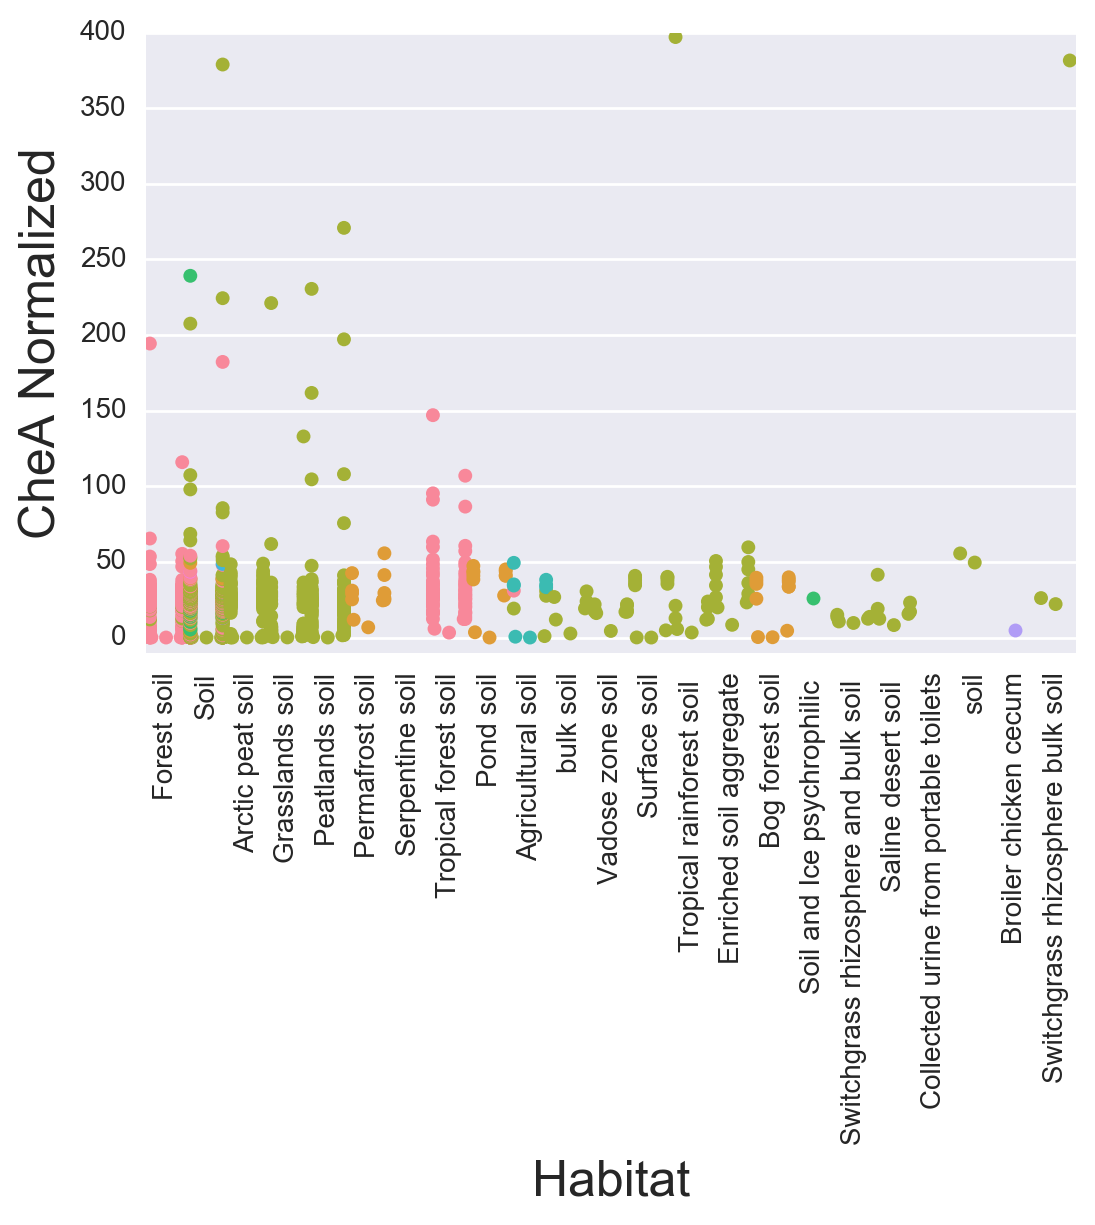

In [316]:
ndf = dfAll[dfAll['Habitat'].str.contains('oil') == True] #new_df[new_df.loc[:,'Habitat'] == 'Soil']
#ndf = new_df
print(len(ndf))
g = sns.swarmplot(data=ndf, x="Habitat", y='CheA Normalized', hue="Ecosystem Subtype")
for label in g.get_xticklabels():
    label.set_rotation(90)
    
g.legend_.remove()
plt.ylim([-10,400])
plt.show()